In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import math

# 1.
- Derive and implement the inverse CDF for an exponential distribution with rate parameter 𝜆 = 1.

In [11]:
def exponential_distribution(x, lamb):
    return lamb * np.exp(-lamb * x)

def inverse_exponetial_CDF(y, lamb):
    return -np.log(1 - y) / lamb

- Generate 1000 random variables using this inverse CDF and create a histogram of the results.
- Overlay the theoretical probability density function of the exponential distribution on the histogram.


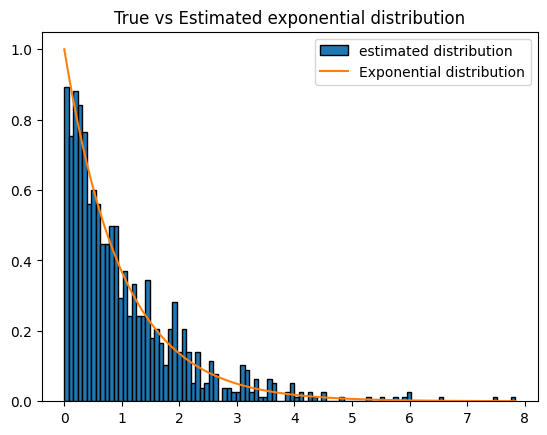

In [84]:
Y = np.random.uniform(0, 1, 1000)
X = inverse_exponetial_CDF(Y, 1)
plt.hist(X, bins=100, density=True, label='estimated distribution', edgecolor='black')
X2 = np.linspace(min(X), max(X), 100)
plt.plot(X2, exponential_distribution(X2, 1), label='Exponential distribution')
plt.title('True vs Estimated exponential distribution')
plt.legend()
plt.show()

- Compare the effectiveness of the inverse transform sampling method to direct sampling methods available in NumPy. Discuss the findings in your report.

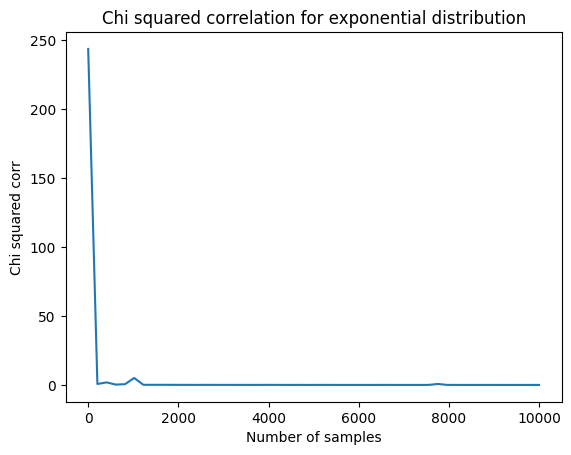

In [79]:
def monte_carlo_integral_approximation(func, a, b, N):
    x = np.random.uniform(a, b, N)
    y = func(x)
    return (b-a)*np.sum(y)/N

def chi_squared_corr(O, E):
    O = O if isinstance(O, np.ndarray) else np.array(O)
    E = E if isinstance(E, np.ndarray) else np.array(E)
    return np.sum((O-E)**2 / np.array(E))

def get_exp_chi2_corr(number_samples, number_bins, lamb):
    Y = np.random.uniform(0, 1, number_samples)
    X = inverse_exponetial_CDF(Y, lamb)
    hist, bins = np.histogram(X, bins=number_bins, density=True)

    O = []
    E = []

    for i in range(len(bins)-1):
        O.append(hist[i]*(bins[i+1] - bins[i]))
        func = partial(exponential_distribution, lamb=lamb)
        E.append(monte_carlo_integral_approximation(func, bins[i], bins[i+1], number_samples))

    O = np.array(O)
    E = np.array(E)

    return chi_squared_corr(O, E)

X = np.linspace(1, 10000, 50).astype(int)
Y = np.array([get_exp_chi2_corr(i, 100, 1) for i in X])
plt.plot(X, Y)
plt.title('Chi squared correlation for exponential distribution')
plt.xlabel('Number of samples')
plt.ylabel('Chi squared corr')
plt.show()

We can see by doing a chi squared correlation plot that with higher values of number of samples that the error between the real and simulated distribution goes to zero, which is a strong indicative that the simulation is correct and on point with Monte-Carlo sampling strategy.

- Do the same as previous analysis but now with another distribution instead of exponential.

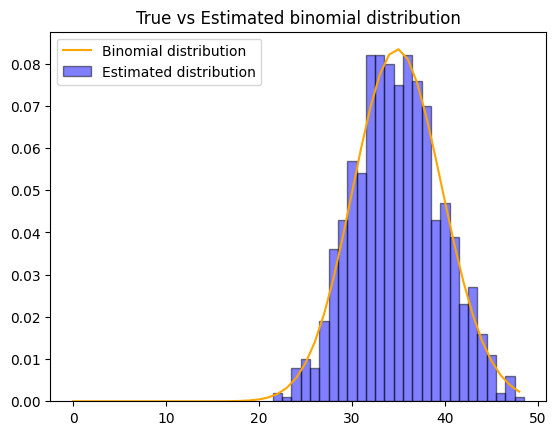

In [89]:
def binomial_distribution(n, k, p):
    return math.comb(n,k)*(p**k)*((1-p)**(n-k))

def bernoulli(p):
    return 1 if random.random() < p else 0

def inverse_binomial_CDF(n, p):
    sum = 0
    for i in range(n):
        sum += bernoulli(p)
    return sum

n = 100
p = 0.35

X = np.array([inverse_binomial_CDF(n, p) for _ in range(1000)])
unique = np.unique(X)
hist, bins = np.histogram(X, bins=len(unique), density=True)
hist=hist/np.sum(hist)

for i in range(len(bins)-2):
    plt.bar(bins[i], hist[i], width=bins[i+1]-bins[i], color='blue', alpha=0.5, edgecolor='black')
plt.bar(bins[-2], hist[-1], width=bins[-1]-bins[-2], color='blue', alpha=0.5, edgecolor='black', label='Estimated distribution')

K = list(range(0,max(X),1))
Y = np.array([binomial_distribution(n, k, p) for k in K])

plt.plot(K, Y, label='Binomial distribution', color='orange')
plt.title('True vs Estimated binomial distribution')
plt.legend()
plt.show()
    

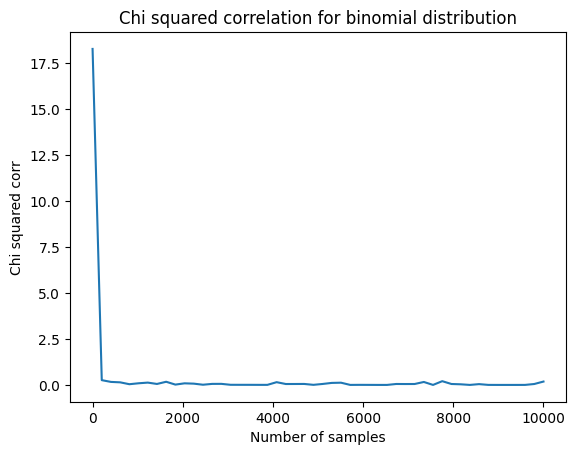

In [80]:
def get_binomial_chi2_corr(number_samples, n, p):

    X = np.array([inverse_binomial_CDF(n, p) for _ in range(number_samples)])
    unique = np.unique(X)
    hist, bins = np.histogram(X, bins=len(unique), density=True)
    hist=hist/np.sum(hist)

    O = hist
    E = []
    for e in unique:
        E.append(binomial_distribution(n, e, p))
    E = np.array(E)

    return chi_squared_corr(O, E)

n = 100
p = 0.35

X = np.linspace(1, 10000, 50).astype(int)
Y = np.array([get_binomial_chi2_corr(i, n, p) for i in X])
plt.plot(X, Y)
plt.title('Chi squared correlation for binomial distribution')
plt.xlabel('Number of samples')
plt.ylabel('Chi squared corr')
plt.show()

# 2.
- Write a function to generate 𝑛 random samples from the uniform distribution over [0, 1], compute 𝑔(𝑋𝑖), and apply the importance sampling estimator to estimate the integral.

In [4]:
g = lambda x: np.exp(-x**2/2)
f = lambda x: 1

def importance_sampling_estimator(g, f, number_samples):
    X = np.random.uniform(0, 1, number_samples)
    Y = g(X)/f(X)
    return np.mean(Y)

- Evaluate this function for 𝑛 = 1, 10, and 100, and repeat each experiment 100 times. Store the estimates.

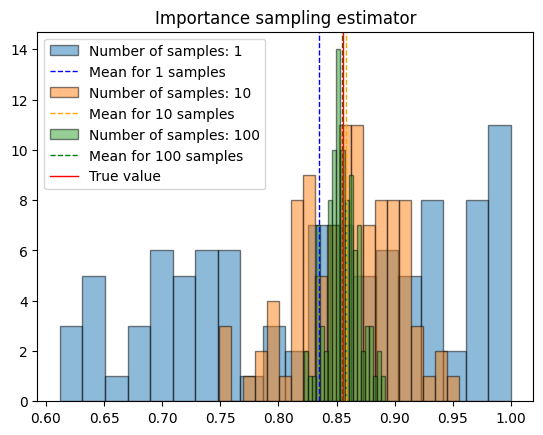

In [18]:
times = 100
num_samples = [1,10,100]
results = {}

for n in num_samples:
    results[n] = [importance_sampling_estimator(g, f, n) for _ in range(times)]

- Plot a histogram of the estimates for each 𝑛 and mark the true integral value with a vertical line next to a vertical line with the mean of the estimates.

In [ ]:
colors = ['blue', 'orange', 'green']

for k,v in results.items():
    plt.hist(v, bins=20, edgecolor='black', alpha=0.5, label=f'Number of samples: {k}')
    plt.axvline(np.mean(v), color=colors.pop(0), linestyle='dashed', linewidth=1, label=f'Mean for {k} samples')
plt.axvline(0.855624, color='red', linewidth=1, label='True value')


plt.title('Importance sampling estimator')
plt.legend()
plt.show()

- Analyze the distribution of the estimates and the effect of the number of samples on the accuracy and precision.

As before, we can see that higher number of samples gives us better approximation of the true value. The means of each sampling number distribution also tends to be really close to the true expected value as a function from the number of samples.

# 3.

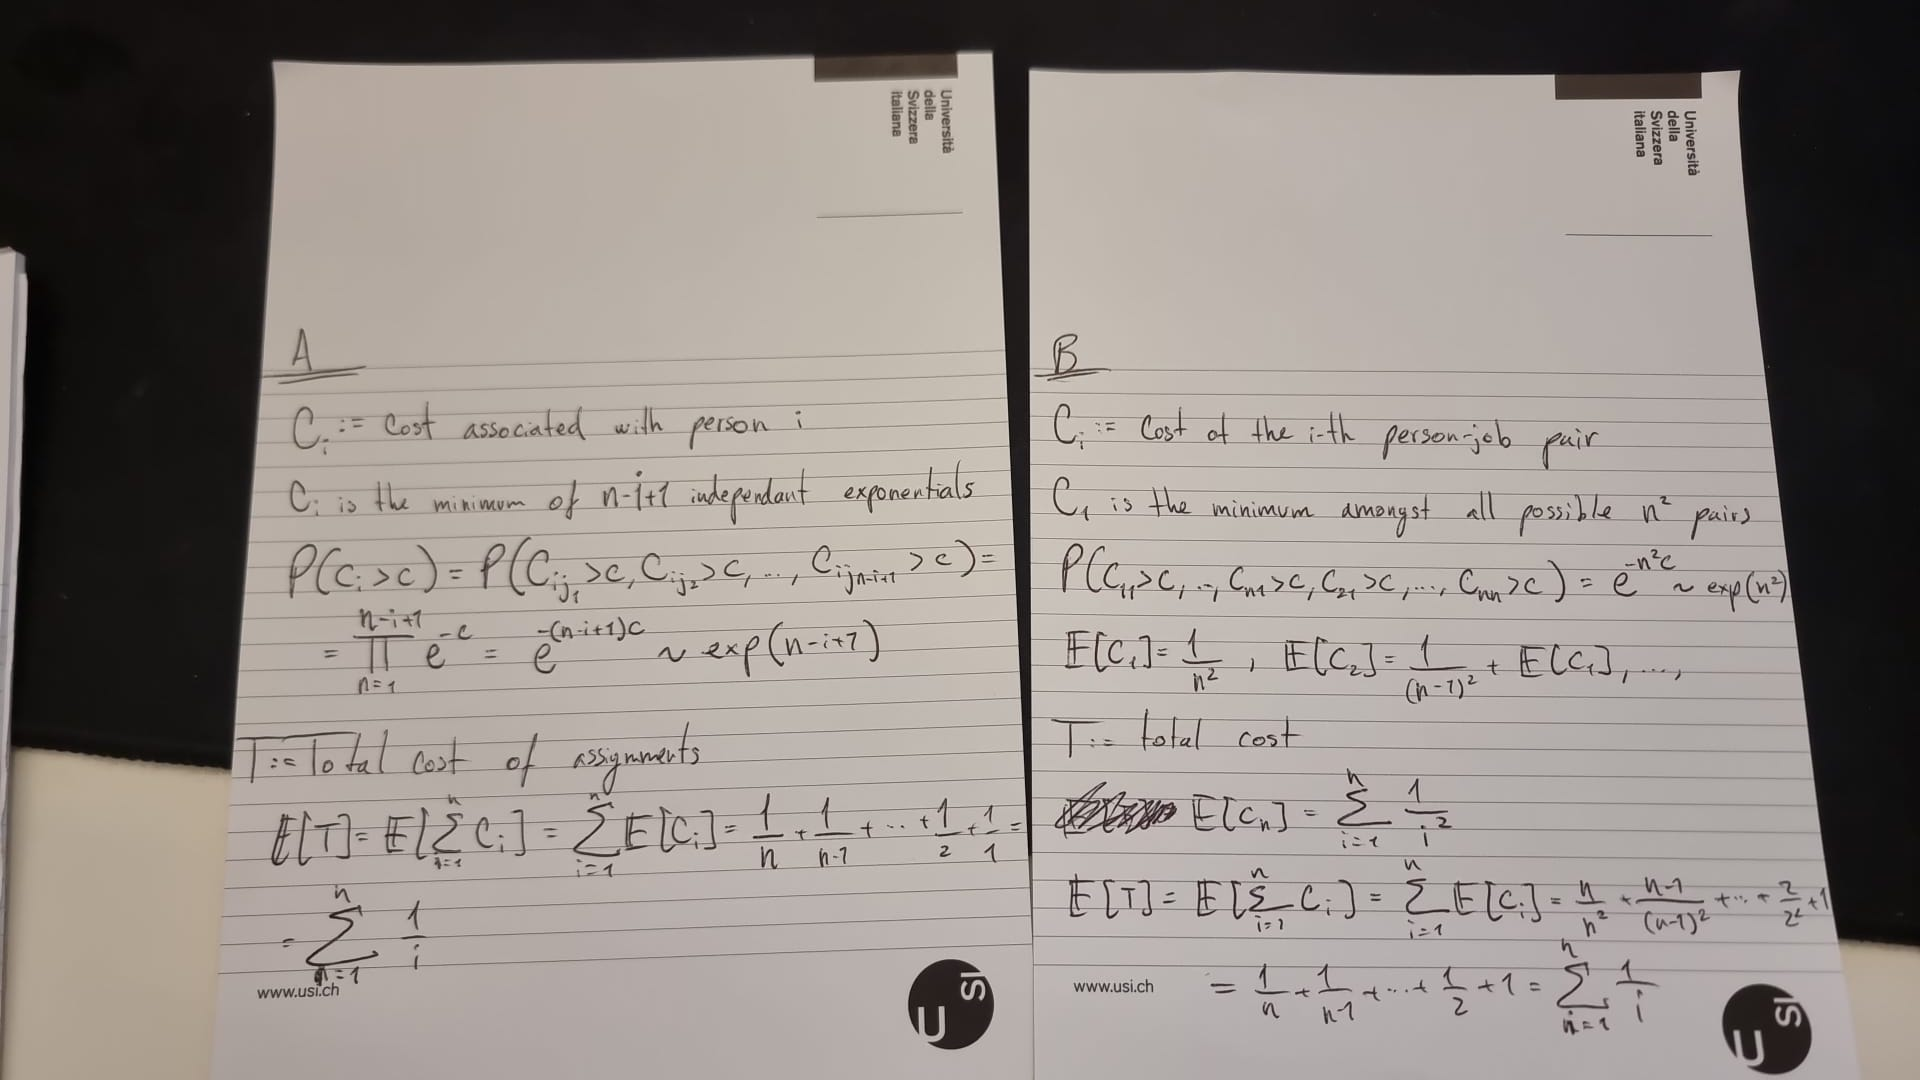

In [5]:
from IPython import display
display.Image("ex3.jpeg")

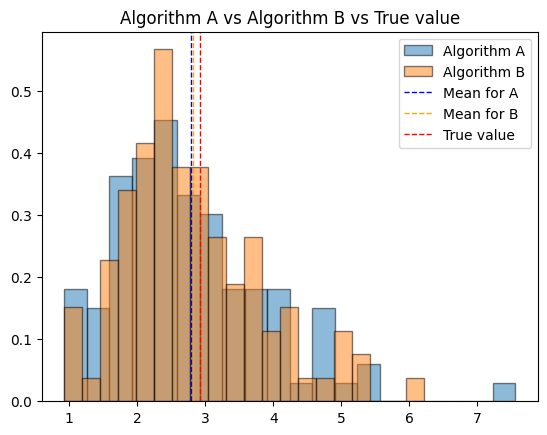

In [34]:
def get_person_job_cost(number_persons_jobs):
    person_job_cost = []
    
    for i in range(number_persons_jobs):
        for j,c in enumerate(inverse_exponetial_CDF(np.random.uniform(0,1,number_persons_jobs), 1)):
            person_job_cost.append((i,j,c))
            
    return person_job_cost

def algo_A(person_job_cost):
    total_cost = 0
    persons = set([x[0] for x in person_job_cost])

    for p in persons:
        job,cost = min([(x[1],x[2]) for x in person_job_cost if x[0] == p], key=lambda x: x[1])
        total_cost += cost
        person_job_cost = [x for x in person_job_cost if x[0] != p and x[1] != job]

    return total_cost

def algo_B(person_job_cost):       
    cost = 0
    
    while len(person_job_cost) > 0:
        min_cost_tuple = min(person_job_cost, key=lambda x: x[2])
        cost += min_cost_tuple[2]
        person_job_cost = [x for x in person_job_cost if x[0] != min_cost_tuple[0] and x[1] != min_cost_tuple[1]]
    
    return cost
        
def harmonic_sum(n=10):
    return sum([1/i for i in range(1,n+1)])


A = []
B = []

for _ in range(100):
    person_job_cost = get_person_job_cost(10)
    A.append(algo_A(person_job_cost))
    B.append(algo_B(person_job_cost))

true_val = harmonic_sum(10)


#histogram
plt.hist(A, bins=20, edgecolor='black', density=True, alpha=0.5, label='Algorithm A')
plt.hist(B, bins=20, edgecolor='black', density=True, alpha=0.5, label='Algorithm B')
plt.axvline(np.mean(A), color='blue', linestyle='dashed', linewidth=1, label='Mean for A')
plt.axvline(np.mean(B), color='orange', linestyle='dashed', linewidth=1, label='Mean for B')
plt.axvline(true_val, color='red', linestyle='dashed', linewidth=1, label='True value')
plt.title('Algorithm A vs Algorithm B vs True value')
plt.legend()
plt.show()

- Discuss which of the two algorithms is likely to result in a smaller expected total cost. Provide a justification for your answer based on the theoretical and numerical results.

We can see that both algorithms converge to the same average expected value, which is congruent with the theoretical analysis.

# 5.

In [52]:
def exercise4_cmtc(lamb, u1, u2, number_events):

    time_between_arrivals = inverse_exponetial_CDF(np.random.uniform(0,1,number_events),lamb)
    arrivals = np.cumsum(time_between_arrivals).tolist()
    process_1_times = inverse_exponetial_CDF(np.random.uniform(0,1,number_events),u1)
    process_2_times = inverse_exponetial_CDF(np.random.uniform(0,1,number_events),u2)
    
    current_time = 0

    task_in_out_times = {}
    for j,a in enumerate(arrivals):
        task_in_out_times[j] = {}
        task_in_out_times[j]['arrival'] = a

    for i in range(number_events):
        elements_in_queue = sorted([j for j,v in enumerate(arrivals) if v <= current_time and j>=i])

        if len(elements_in_queue) == 0:
            current_time = arrivals[i]

        task_in_out_times[i]['start'] = current_time
        current_time += process_1_times[i] + process_2_times[i]
        task_in_out_times[i]['end'] = current_time
    
    lateness = []
    queue_status = []
    for k,v in task_in_out_times.items():
        queue_status.append((k,v['arrival']))
        queue_status.append((k,v['start']))
        if v['arrival'] == v['start']:
            lateness.append(0)
        else:
            lateness.append(v['start'] - v['arrival'])

    seen = []
    current_count = 0
    queue_time_accum = [(0,0)]
    queue_status = sorted(queue_status, key=lambda x: x[1])
    for (k,v) in queue_status:
        if k not in seen:
            seen.append(k)
            current_count += 1
            queue_time_accum.append((current_count, v))
        else:
            current_count -= 1
            queue_time_accum.append((current_count, v))

    total_time = max([v['end'] for k,v in task_in_out_times.items()])
    average_element_queue = 0
    for j in range(0,len(queue_time_accum)-1):
        average_element_queue += queue_time_accum[j][0]*(queue_time_accum[j+1][1] - queue_time_accum[j][1])

    average_element_queue /= total_time
    average_lateness = np.mean(lateness)

    return average_element_queue, average_lateness

            

def exercise4_trials(num_trials, lamb, u1, u2, number_events):
    late_avgs = []
    queue_avgs = []

    for _ in range(num_trials):
        average_lateness, average_element_queue = exercise4_cmtc(lamb,u1,u2,number_events)
        late_avgs.append(average_lateness)
        queue_avgs.append(average_element_queue)

    plt.hist(late_avgs, bins=20, edgecolor='black', alpha=0.5, label='Lateness')
    plt.axvline(np.mean(late_avgs), color='blue', linestyle='dashed', linewidth=1, label='Mean for lateness')
    plt.legend()
    plt.title(f'Lateness, average of averages over {num_trials} trials, lamb={lamb}, u1={u1}, u2={u2}')
    plt.show()

    plt.hist(queue_avgs, bins=5, edgecolor='black', alpha=0.5, label='Queue')
    plt.axvline(np.mean(queue_avgs), color='orange', linestyle='dashed', linewidth=1, label='Mean for queue')
    plt.title(f'Queue, average of averages over {num_trials} trials, lamb={lamb}, u1={u1}, u2={u2}')
    plt.legend()
    plt.show()

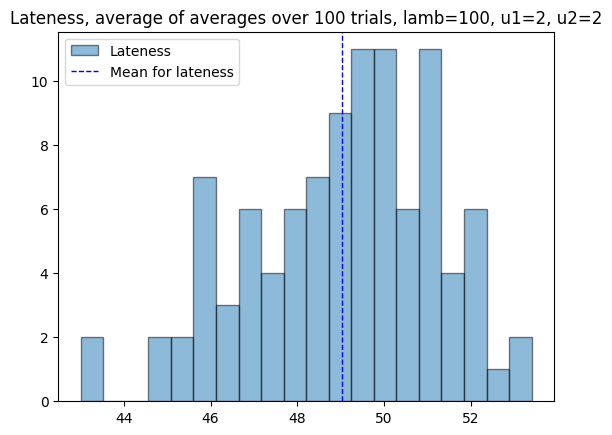

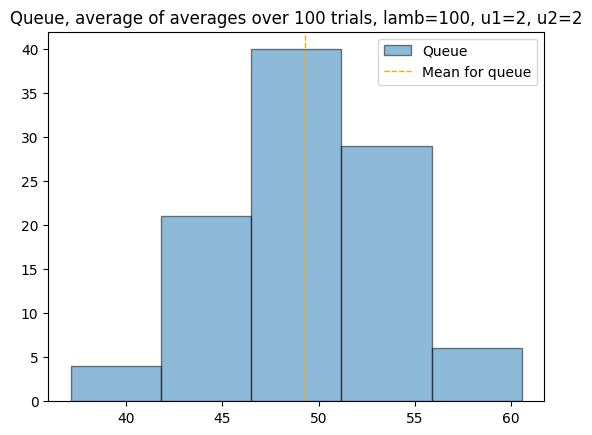

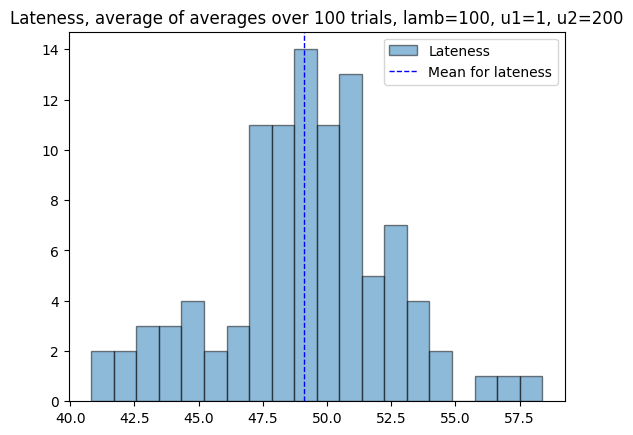

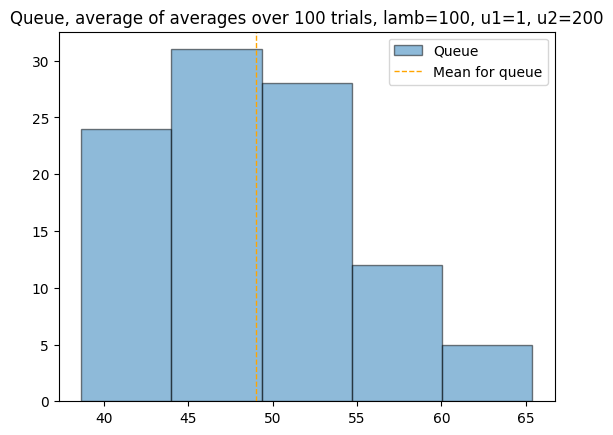

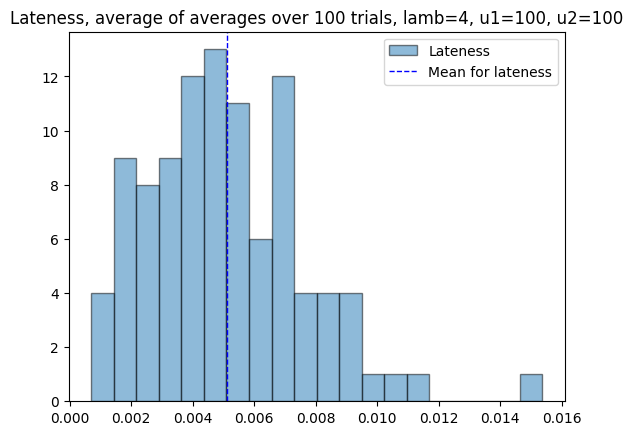

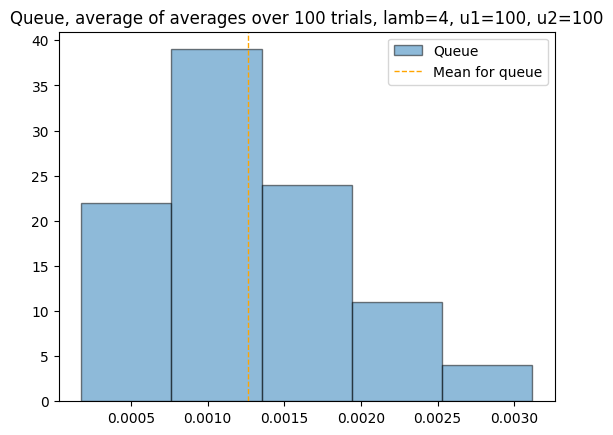

In [91]:
exercise4_trials(num_trials = 100, lamb = 100, u1 = 2, u2 = 2, number_events = 100)
exercise4_trials(num_trials = 100, lamb = 100, u1 = 1, u2 = 200, number_events = 100)
exercise4_trials(num_trials = 100, lamb = 4, u1 = 100, u2 = 100, number_events = 100)

The plots above show the histogram and the average of the averages of the time in queue (lateness) and the number of elements in queue. 
We can see that for higher rates of lambda than the sum of the mnius, there tends to be more lateness and elements in queue, which is expected. On the other hand, when we have small values of lambda but high values of mnius then processed are quicker than the rate of income of the tasks, thus we have less elements in queue and waiting times in averages.

# 5.

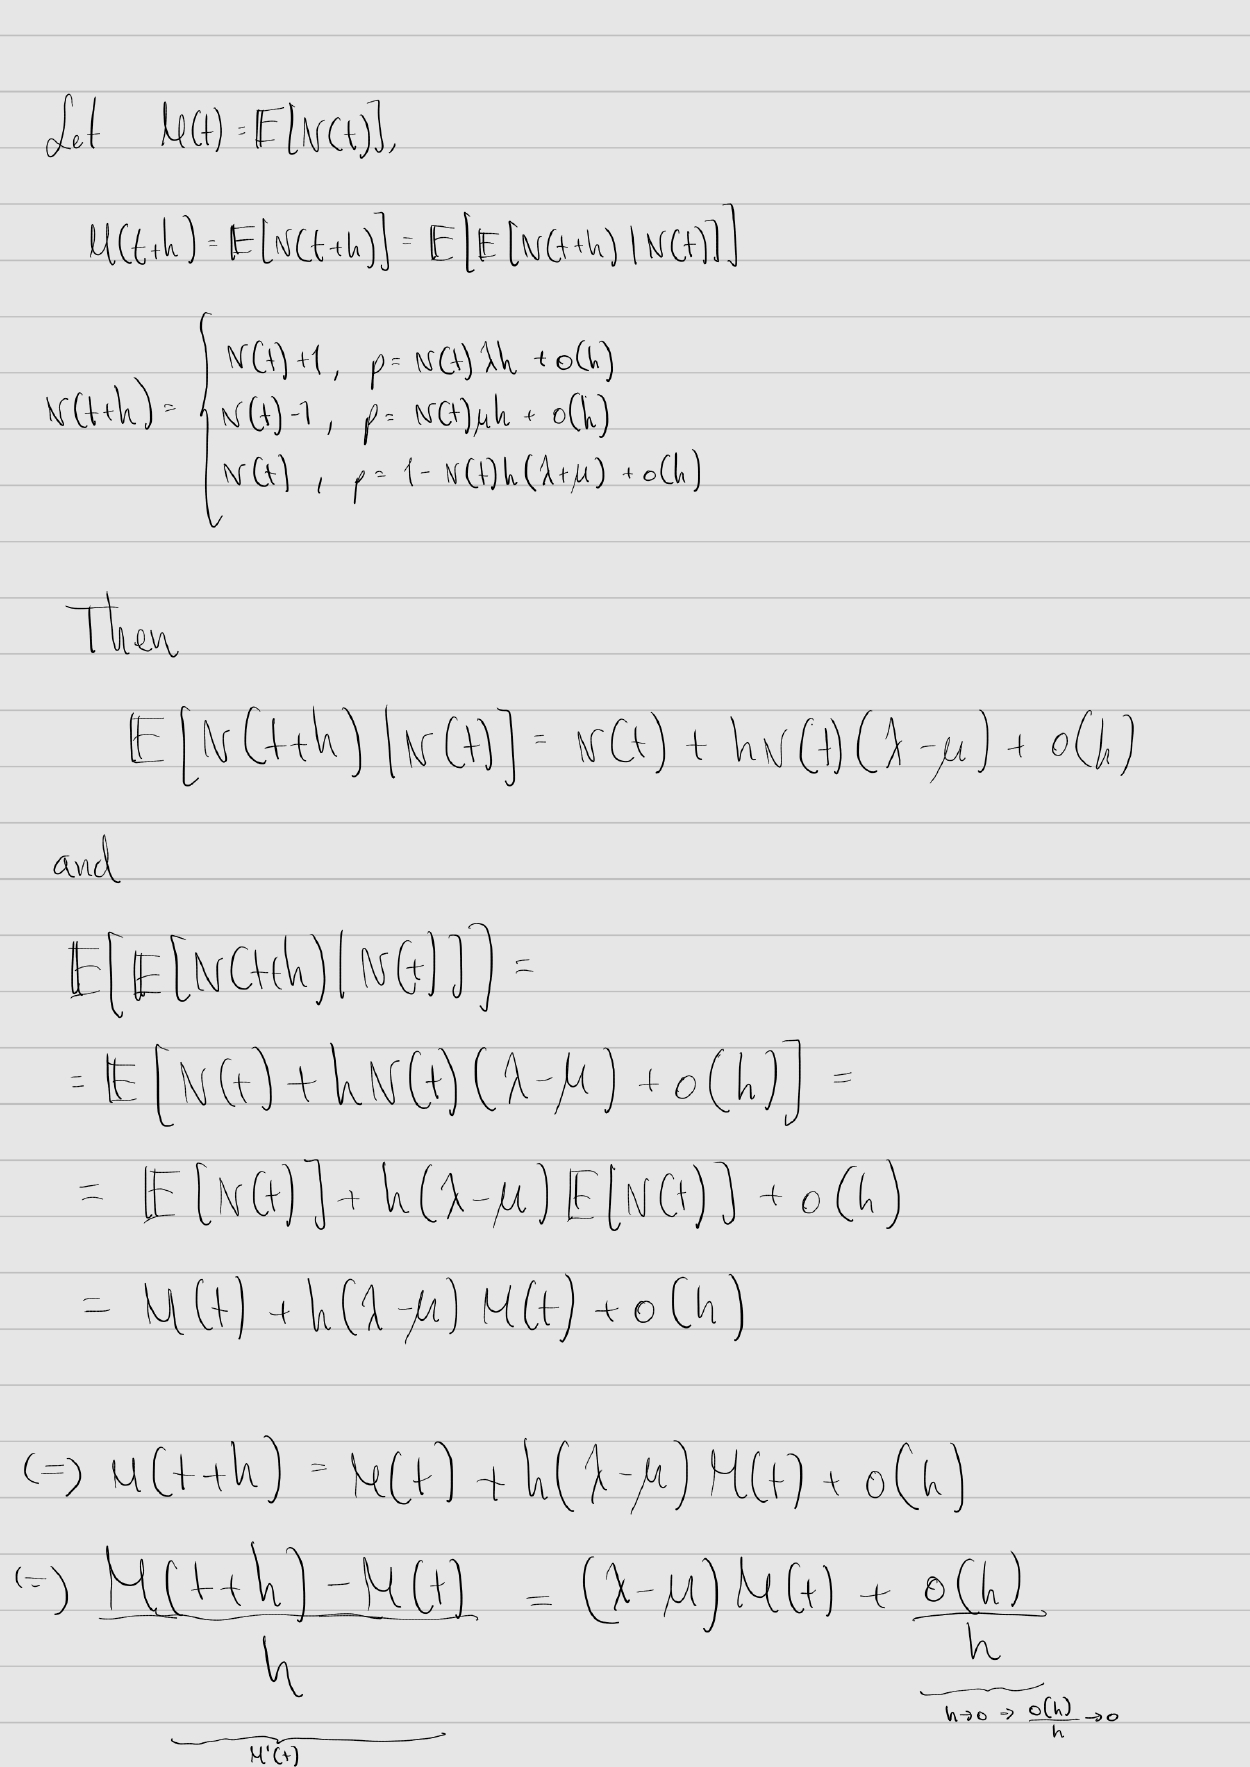

In [94]:
from IPython import display
display.Image("ex5_1.jpg")

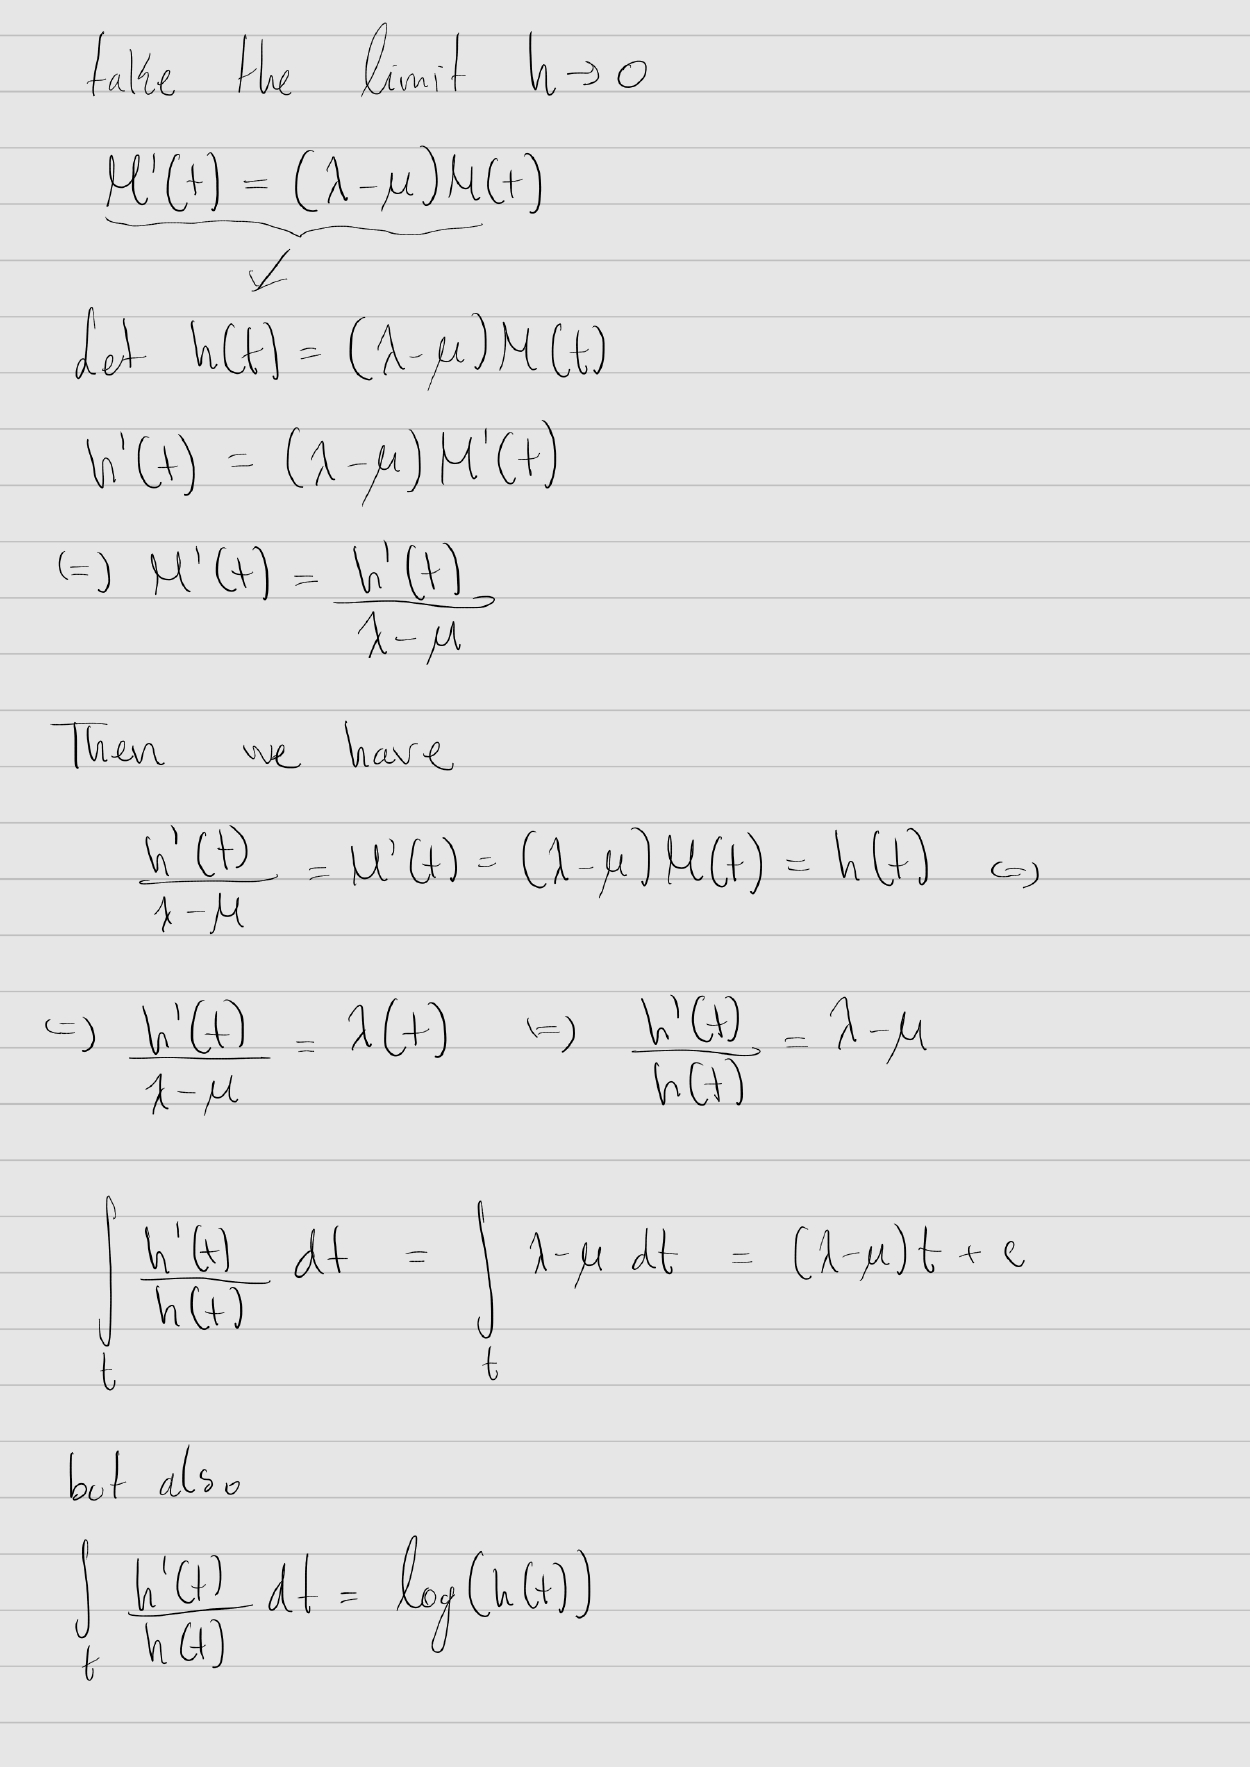

In [95]:
display.Image("ex5_2.jpg")

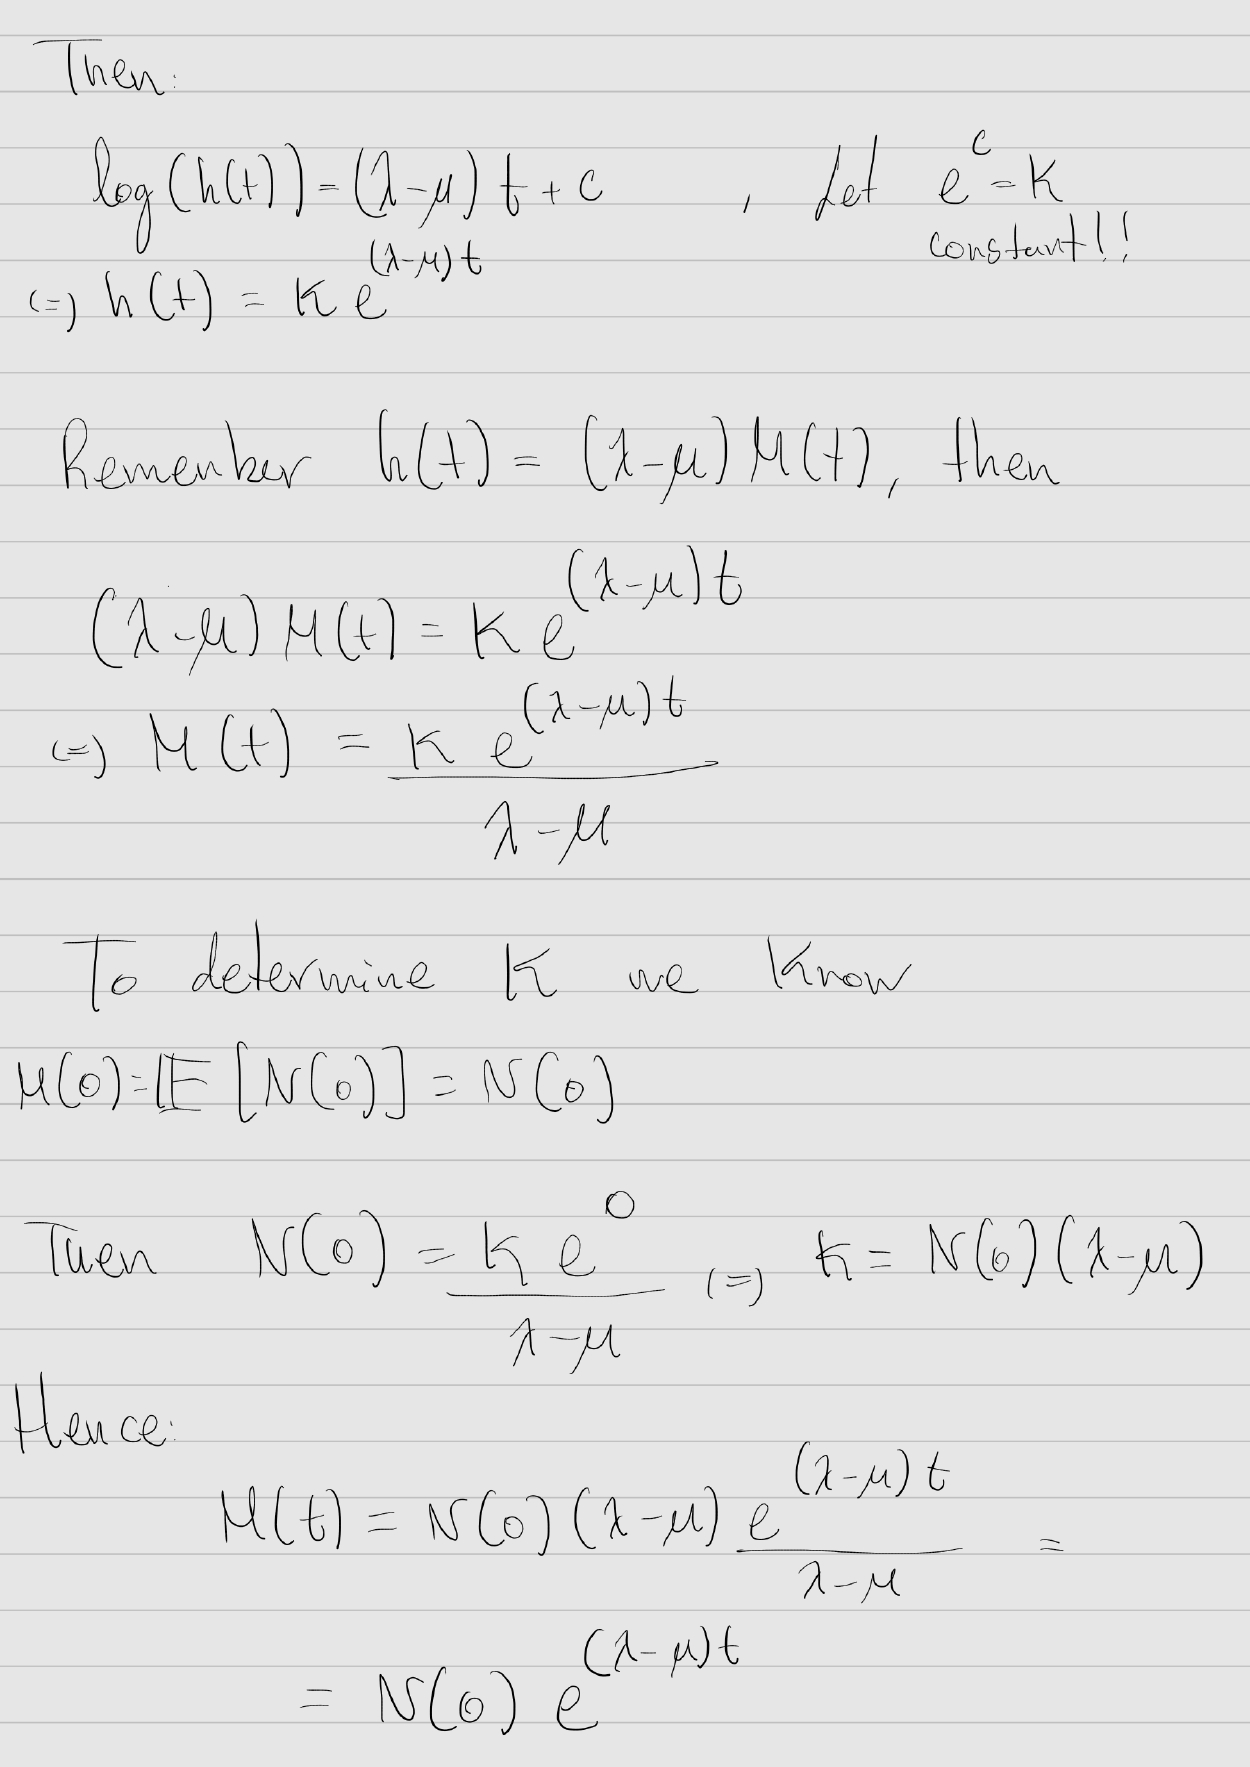

In [96]:
display.Image("ex5_3.jpg")

In [131]:
def expected_birth_death_individuals(n0, dt, lamb, mniu):
    return n0*np.exp((lamb-mniu)*dt)

def incremental_birth_death_individuals(T, n0, lamb, mniu, dt):
    times = np.arange(0,T+dt,dt)
    persons = np.zeros_like(times)
    persons[0] = n0

    for i in range(1,len(times)):
        born = np.random.poisson(lamb*dt*persons[i-1])
        dead = np.random.poisson(mniu*dt*persons[i-1])
        persons[i] = persons[i-1] + born - dead
    
    return times, persons

In [132]:
n0 = 70
lamb = 0.5
mniu = 0.51
T = 100
dt = 0.001

times, persons = incremental_birth_death_individuals(T, n0, lamb, mniu, dt)
true_values = expected_birth_death_individuals(n0, times, lamb, mniu)

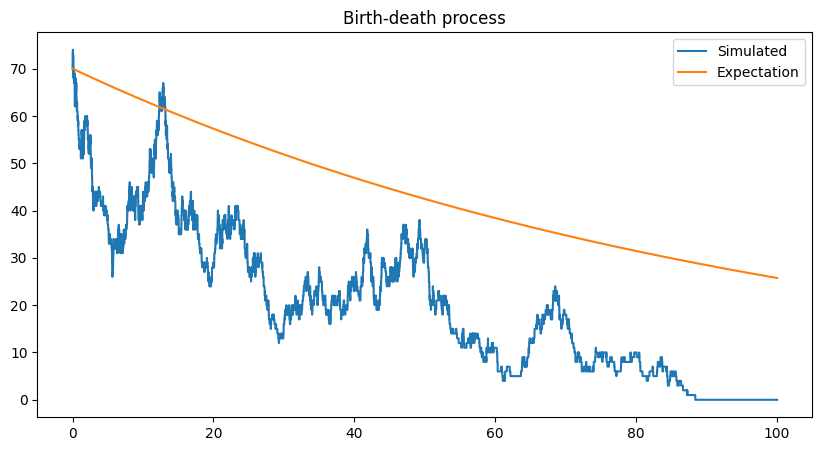

In [133]:
plt.figure(figsize=(10,5))
plt.plot(times, persons, label='Simulated')
plt.plot(times, true_values, label='Expectation')
plt.title('Birth-death process')
plt.legend()
plt.show()


In [134]:
n0 = 70
lamb = 0.6
mniu = 0.4
T = 100
dt = 0.001

times, persons = incremental_birth_death_individuals(T, n0, lamb, mniu, dt)
true_values = expected_birth_death_individuals(n0, times, lamb, mniu)

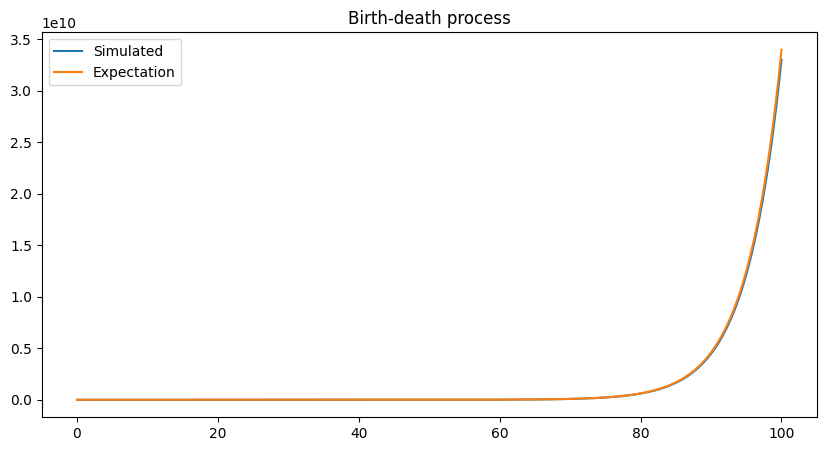

In [135]:
plt.figure(figsize=(10,5))
plt.plot(times, persons, label='Simulated')
plt.plot(times, true_values, label='Expectation')
plt.title('Birth-death process')
plt.legend()
plt.show()

We can see in the aboce images that values for lamb = mniu there tends to be more oscilations, which is expected, whereas if one rate is bigger than the other then the tendency follows the given rate category (more or less individuals, respective to lamb>mniu and lamb<mniu)